# Year 2

## Importing modules

In [2]:
#standard libs
from math import sqrt
import random
import os

#default data science libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#modules for data preprocessing
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, KFold
from sklearn.model_selection import RandomizedSearchCV

#classification models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

#evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier




## loading data

In [3]:
data = pd.read_excel('data/2year.xlsx')
data['B'] = (data['B'].index > 9772).astype(int)

In [4]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,B
0,0.202350,0.46500,0.240380,1.5171,-14.547,0.510690,0.25366,0.91816,1.15190,0.42695,...,0.13184,0.473950,0.86816,0.00024,8.5487,5.16550,107.740,3.38790,5.3440,0
1,0.030073,0.59563,0.186680,1.3382,-37.859,-0.000319,0.04167,0.67890,0.32356,0.40437,...,0.12146,0.074369,0.87235,0.00000,1.5264,0.63305,622.660,0.58619,1.2381,0
2,0.257860,0.29949,0.665190,3.2211,71.799,0.000000,0.31877,2.33200,1.67620,0.69841,...,0.16499,0.369210,0.81614,0.00000,4.3325,3.19850,65.215,5.59690,47.4660,0
3,0.227160,0.67850,0.042784,1.0828,-88.212,0.000000,0.28505,0.47384,1.32410,0.32150,...,0.29358,0.706570,0.78617,0.48456,5.2309,5.06750,142.460,2.56210,3.0066,0
4,0.085443,0.38039,0.359230,1.9444,21.731,0.187900,0.10823,1.37140,1.11260,0.52167,...,0.10124,0.163790,0.89876,0.00000,5.7035,4.00200,89.058,4.09840,5.9874,0


# Data preprocessing

In [5]:
def set_new_headers(df):
    cols = ['X' + str(i+1) for i in range(len(df.columns)-1)]
    cols.append('Y')
    df.columns = cols

imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
mean_imputed_df = pd.DataFrame(imputer.fit_transform(data))
set_new_headers(mean_imputed_df)

data_imp = pd.DataFrame()

X = mean_imputed_df.iloc[:, :-1]
Y = mean_imputed_df.iloc[:,-1]

In [6]:
mean_imputed_df.head(15)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.202350,0.46500,0.240380,1.5171,-14.547,0.510690,0.253660,0.91816,1.15190,0.42695,...,0.131840,0.473950,0.86816,0.000240,8.5487,5.16550,107.7400,3.38790,5.34400,0.0
1,0.030073,0.59563,0.186680,1.3382,-37.859,-0.000319,0.041670,0.67890,0.32356,0.40437,...,0.121460,0.074369,0.87235,0.000000,1.5264,0.63305,622.6600,0.58619,1.23810,0.0
2,0.257860,0.29949,0.665190,3.2211,71.799,0.000000,0.318770,2.33200,1.67620,0.69841,...,0.164990,0.369210,0.81614,0.000000,4.3325,3.19850,65.2150,5.59690,47.46600,0.0
3,0.227160,0.67850,0.042784,1.0828,-88.212,0.000000,0.285050,0.47384,1.32410,0.32150,...,0.293580,0.706570,0.78617,0.484560,5.2309,5.06750,142.4600,2.56210,3.00660,0.0
4,0.085443,0.38039,0.359230,1.9444,21.731,0.187900,0.108230,1.37140,1.11260,0.52167,...,0.101240,0.163790,0.89876,0.000000,5.7035,4.00200,89.0580,4.09840,5.98740,0.0
5,0.287840,0.55225,0.316340,1.7033,38.803,0.390120,0.287840,0.80761,1.29200,0.44600,...,0.225990,0.645370,0.77401,0.229690,7.8151,3.15340,110.8300,3.29330,6.33460,0.0
6,0.153820,0.47248,0.311790,1.6898,-71.985,0.000000,0.190810,1.11650,1.50460,0.52752,...,0.142170,0.291600,0.87368,0.030421,2.6734,7.80930,109.6400,3.32910,6.36920,0.0
7,0.262520,0.45834,0.417040,1.9406,47.511,0.000000,0.262520,1.18180,2.18540,0.54166,...,0.625180,0.484660,0.38590,0.000000,7.7696,4.57600,74.0550,4.92880,15.65800,0.0
8,0.079147,0.02240,0.897050,283.1200,139.750,0.000000,0.097916,43.64300,0.61657,0.97760,...,0.168460,0.080961,0.86061,0.014807,14.2180,79.20300,1.8823,193.91000,6.17980,0.0
9,0.009901,0.71174,0.065186,1.1485,-62.297,0.000000,0.013459,0.40500,1.17380,0.28826,...,0.203090,0.034347,0.83056,0.720470,7.7605,4.12530,136.5400,2.67320,2.36800,0.0


In [7]:
#Using smote to balance data
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=10)
smote = SMOTE(random_state=32)
X_train_sm, y_train_sm= smote.fit_sample(X_train, y_train)

In [8]:
#cross validation
nfolds = 10
nclass = 2
ntrain = X_train_sm.shape[0]
ntest = X_test.shape[0]


kfold = KFold(n_splits=nfolds, random_state=20, shuffle=True)
cross_val = StratifiedKFold(nfolds)

# Creating model objects
## Tuning model hyperparameters

### Logistic regression

In [9]:
log_reg = LogisticRegression()

log_reg_params = {"C": [0.5, 0.55, 0.6],
                 "solver": ['newton-cg', 'sag', 'saga']}

lr_grid = GridSearchCV(log_reg, log_reg_params, cv=cross_val, refit=True, verbose=1, n_jobs=4)

lr_grid.fit(X_train_sm, y_train_sm)
lr_best_est = lr_grid.best_estimator_

print("Accuracy (LogisticRegression): {} with params {}".format(lr_grid.best_score_, lr_best_est))


Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   39.4s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:  1.1min finished


Accuracy (LogisticRegression): 0.7209608905815146 with params LogisticRegression(C=0.6, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


## Decision tree

In [10]:
d_tree = DecisionTreeClassifier()
d_tree_params = {'criterion': ['gini'],
                'max_depth': [50, 60, 70],
                'max_leaf_nodes': [100, 125, 150]}

dt_grid = GridSearchCV(d_tree, d_tree_params, cv=cross_val, refit=True, verbose=1, n_jobs=4)
dt_grid.fit(X_train_sm, y_train_sm)

dt_best_est = dt_grid.best_estimator_
print("Accuracy (Decision tree): {} with params {}".format(dt_grid.best_score_, dt_best_est))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.4s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:   15.7s finished


Accuracy (Decision tree): 0.9272740588838435 with params DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=60,
                       max_features=None, max_leaf_nodes=150,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


## Random forest

In [11]:
r_forest = RandomForestClassifier()
r_forest_params = {'n_estimators': [150,200],
                'criterion': ['gini'],
                'max_depth': [25, 50],
                'max_features': [64],
                'max_leaf_nodes': [10, 25],
                'bootstrap': [True]}

#r_forest_grid = GridSearchCV(r_forest, r_forest_params, cv=cross_val, refit=True, verbose=1, n_jobs=4)
#r_forest_grid.fit(X_train_sm, y_train_sm)
rf_random_grid = RandomizedSearchCV(r_forest, r_forest_params, cv=cross_val, refit=True, verbose=1, n_jobs=-1)
rf_random_grid.fit(X_train_sm, y_train_sm)

rf_best_est = rf_random_grid.best_estimator_
print("Accuracy (Random forest): {} with params {}".format(rf_random_grid.best_score_, rf_best_est))

Fitting 10 folds for each of 8 candidates, totalling 80 fits


C:\Developement\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 16.4min finished


Accuracy (Random forest): 0.8768858942434451 with params RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features=64, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


## SVM

In [12]:
#
# SVM classifier в разработке
#


#svm = SVC()
#svm_params = {'kernel': ['linear', 'poly'],
#                'probability': [True],
#                'decision_function_shape': ['ovo']}

#svm_grid = GridSearchCV(svm, svm_params, cv=cross_val, refit=True, verbose=1, n_jobs=-1)
#svm_grid.fit(X_train_sm, y_train_sm)

#svm_grid = RandomizedSearchCV(svm, svm_params, cv=cross_val, refit=True, verbose=1, n_jobs=-1)
#svm_grid.fit(X_train_sm, y_train_sm)

#svm_best_est = svm_grid.best_estimator_
#print("Accuracy (SVM): {} with params {}".format(svm_grid.best_score_, svm_best_est))

## XGboost

In [13]:
xgboost = xgb.XGBClassifier()
xg_params = {
    'booster': ['gbtree', 'gblinear'],
    'eta': [0.3, 0,5],
    'objective': ['binary:logitraw', 'binary:hinge'],
    'gamma':[0,1],
    'max_depth': [8],
    'learning_rate': [0.1, 0.15]
}

#xgb_grid = GridSearchCV(xgboost, xg_params, cv=cross_val, refit=True, verbose=1, n_jobs=4)
#xgb_grid.fit(X_train_sm, y_train_sm)

xgb_grid = RandomizedSearchCV(xgboost, xg_params, cv=cross_val, refit=True, verbose=1, n_jobs=-1)
xgb_grid.fit(X_train_sm, y_train_sm)

xgb_best_est = xgb_grid.best_estimator_
print("Accuracy (XGboosting): {} with params {}".format(xgb_grid.best_score_, xgb_best_est))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished


Accuracy (XGboosting): 0.9921634685806358 with params XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0, gamma=0,
              learning_rate=0.15, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logitraw', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


# Second level

In [14]:
def show_feature_importance(model, features):
    plt.figure(figsize=(12,8))
    results=pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
    results=results.sort_values('importance', ascending=False)
    print(results.head(10))
    results.head(20).plot(x = 'feature', y = 'importance', kind = 'barh',
                     color = 'red', edgecolor = 'k', title = 'Feature Importances')
    return results

In [15]:
ntrain=X_train_sm.shape[0]
ntest = X_test.shape[0]
nclass = 2
SEED = 42
NFOLDS = 10

kf = KFold(n_splits=NFOLDS, random_state=SEED, shuffle=True)
labels = ['Normal','Bankruptcy']

In [20]:
def BuildModel(best_alg, X_train, y_train, X_test, kf, ntrain, ntest, nclass, NfOLDS):
    Xr_train = np.zeros((ntrain, nclass))
    Xr_test = np.zeros((ntest, nclass))
    tr_ind = np.arange(ntrain)
    print(Xr_train, Xr_test, tr_ind)
    
    for i, (train, test) in enumerate(kf.split(tr_ind)):
        clf = best_alg
        clf.fit(X_train[train], y_train[train])
        sc = clf.score(X_train[test], y_train[test])
        print(i, 'accuracy', sc)
        Xr_train[test] = clf.predict_proba(X_train[test])
        Xr_test += clf.predict_proba(X_test)/NFOLDS
    
    return Xr_train, Xr_test


def BuildModel_Xgb(best_alg, X_train, y_train, X_test, kf, ntrain, ntest, nclass, NfOLDS):
    Xr_train = np.zeros((ntrain, nclass))
    Xr_test = np.zeros((ntest, nclass))
    tr_ind = np.arange(ntrain)
    print(Xr_train, Xr_test, tr_ind)
    
    for i, (train, test) in enumerate(kf.split(tr_ind)):
        clf = best_alg
        clf.fit(X_train[train], y_train[train])
        sc = clf.score(X_train[test], y_train[test])
        print(i, 'accuracy', sc)
        Xr_train[test] = clf.predict_proba(X_train[test])
        Xr_test += clf.predict_proba(X_test, validate_features=False)/NFOLDS
    
    return Xr_train, Xr_test

In [21]:
def show_accuracy(Xr, y, labels, best, nclass):
    pred=[]
    for x in Xr:
        if x > best:
            pred.append(1)
        else:
            pred.append(0)
    print(classification_report(y,pred, target_names=labels, digits=4))
    print(confusion_matrix(y, pred, labels=range(nclass)))

In [22]:
def show_auc(y_train_set, pred_train_set):
    thresholds = np.linspace(0.01, 0.5, 1000)
    f1_sc = np.array([f1_score(y_train_set, pred_train_set[:,1] > thr) for thr in thresholds])
    plt.figure(figsize=(12,8))
    plt.plot(thresholds, f1_sc, linewidth=4)
    plt.ylabel("F1 score", fontsize=18)
    plt.xlabel("Threshold", fontsize=18)
    
    best_model_f1 = thresholds[f1_sc.argmax()]
    
    return best_model_f1

## Logistic regression

In [23]:
lr_best = LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
pred_train, pred_test=BuildModel(lr_best, X_train_sm, y_train_sm, X_test,kf, ntrain, ntest, nclass, NFOLDS)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]] [[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]] [    0     1     2 ... 13651 13652 13653]


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


0 accuracy 0.7005856515373353


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


1 accuracy 0.7064421669106882


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


2 accuracy 0.7232796486090776


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


3 accuracy 0.7137628111273792


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


4 accuracy 0.7274725274725274


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


5 accuracy 0.7084249084249085


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


6 accuracy 0.736996336996337


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


7 accuracy 0.7047619047619048


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


8 accuracy 0.7355311355311356
9 accuracy 0.726007326007326


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


0.7429977289931871
0.45545454545454545


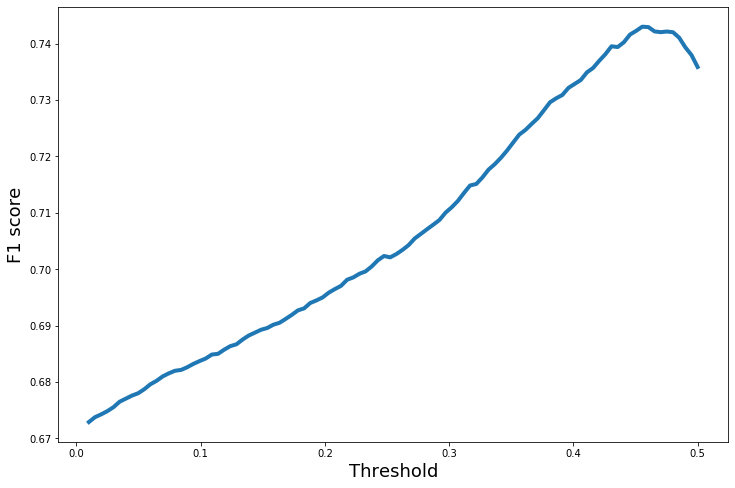

In [26]:
thresholds = np.linspace(0.01, 0.5, 100)
f1_sc = np.array([f1_score(y_train_sm,pred_train[:,1] > thr) for thr in thresholds])
plt.figure(figsize=(12,8))
plt.plot(thresholds, f1_sc, linewidth=4 )
plt.ylabel("F1 score", fontsize=18)
plt.xlabel("Threshold", fontsize=18)
#plt.savefig("Xgb-thr.jpg", dpi=300)
best_lr = thresholds[f1_sc.argmax()]
print(f1_sc.max())
print(best_lr_f1)

In [27]:
show_accuracy(pred_train[:,1],y_train_sm, labels, best_lr, nclass)

              precision    recall  f1-score   support

      Normal     0.7974    0.5406    0.6444      6827
  Bankruptcy     0.6525    0.8626    0.7430      6827

    accuracy                         0.7016     13654
   macro avg     0.7249    0.7016    0.6937     13654
weighted avg     0.7249    0.7016    0.6937     13654

[[3691 3136]
 [ 938 5889]]


## Decision tree

In [28]:
dt_best = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
                       max_features=None, max_leaf_nodes=150,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
pred_train_dt, pred_test_dt=BuildModel(dt_best, X_train_sm, y_train_sm, X_test,kf, ntrain, ntest, nclass, NFOLDS)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]] [[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]] [    0     1     2 ... 13651 13652 13653]
0 accuracy 0.9224011713030746
1 accuracy 0.9267935578330894
2 accuracy 0.931185944363104
3 accuracy 0.9150805270863837
4 accuracy 0.926007326007326
5 accuracy 0.9252747252747253
6 accuracy 0.9267399267399268
7 accuracy 0.9208791208791208
8 accuracy 0.9406593406593406
9 accuracy 0.9238095238095239


0.9272988505747126
0.5


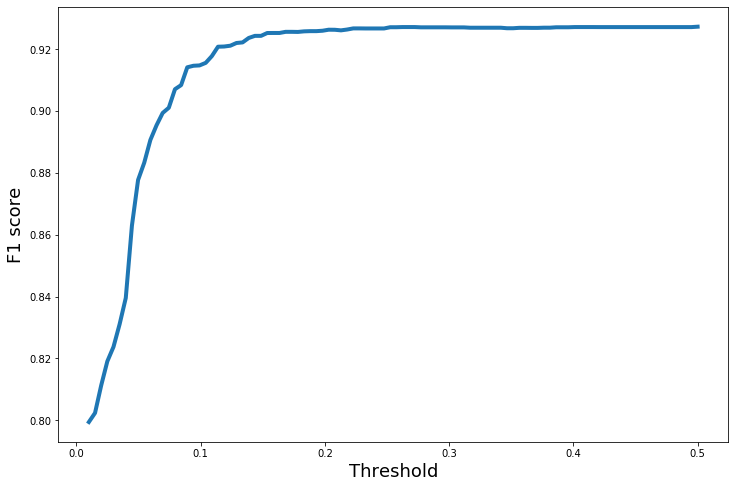

In [29]:
thresholds = np.linspace(0.01, 0.5, 100)
f1_sc_dt = np.array([f1_score(y_train_sm,pred_train_dt[:,1] > thr) for thr in thresholds])
plt.figure(figsize=(12,8))
plt.plot(thresholds, f1_sc_dt, linewidth=4 )
plt.ylabel("F1 score", fontsize=18)
plt.xlabel("Threshold", fontsize=18)
#plt.savefig("Xgb-thr.jpg", dpi=300)
best_dt_f1 = thresholds[f1_sc_dt.argmax()]
print(f1_sc_dt.max())
print(best_dt_f1)

In [30]:
show_accuracy(pred_train_dt[:,1],y_train_sm, labels, best_dt_f1, nclass)

              precision    recall  f1-score   support

      Normal     0.9431    0.9064    0.9244      6827
  Bankruptcy     0.9099    0.9454    0.9273      6827

    accuracy                         0.9259     13654
   macro avg     0.9265    0.9259    0.9259     13654
weighted avg     0.9265    0.9259    0.9259     13654

[[6188  639]
 [ 373 6454]]


## Random forest

In [31]:
rf_best = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features=64, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

pred_train_rf, pred_test_rf = BuildModel(rf_best, X_train_sm, y_train_sm, X_test,kf, ntrain, ntest, nclass, NFOLDS)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]] [[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]] [    0     1     2 ... 13651 13652 13653]
0 accuracy 0.8653001464128843
1 accuracy 0.8543191800878477
2 accuracy 0.8923865300146413
3 accuracy 0.863103953147877
4 accuracy 0.884981684981685
5 accuracy 0.8652014652014652
6 accuracy 0.8732600732600733
7 accuracy 0.8776556776556776
8 accuracy 0.8805860805860806
9 accuracy 0.8703296703296703


f1 score of random forest:  0.8770937875468231
0.44555555555555554


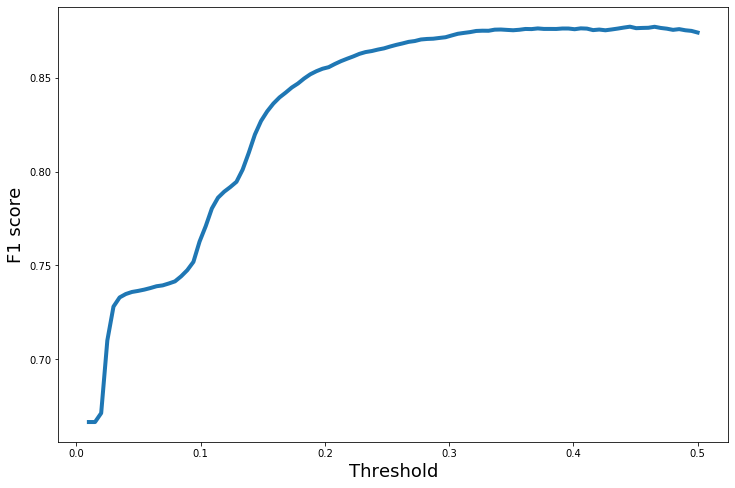

In [32]:
thresholds = np.linspace(0.01, 0.5, 100)
f1_sc_rf = np.array([f1_score(y_train_sm,pred_train_rf[:,1] > thr) for thr in thresholds])
plt.figure(figsize=(12,8))
plt.plot(thresholds, f1_sc_rf, linewidth=4 )
plt.ylabel("F1 score", fontsize=18)
plt.xlabel("Threshold", fontsize=18)
best_rf_f1 = thresholds[f1_sc_rf.argmax()]
print('f1 score of random forest: ', f1_sc_rf.max())
print(best_rf_f1)

In [33]:
show_accuracy(pred_train_rf[:,1],y_train_sm, labels, best_rf_f1, nclass)

              precision    recall  f1-score   support

      Normal     0.9018    0.8364    0.8678      6827
  Bankruptcy     0.8474    0.9089    0.8771      6827

    accuracy                         0.8726     13654
   macro avg     0.8746    0.8726    0.8725     13654
weighted avg     0.8746    0.8726    0.8725     13654

[[5710 1117]
 [ 622 6205]]


## Xgboost

In [34]:
xgb_best = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=5, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logitraw', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

pred_train_xgb, pred_test_xgb = BuildModel_Xgb(xgb_best, X_train_sm, y_train_sm, X_test, kf, ntrain, ntest, nclass, NFOLDS)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]] [[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]] [    0     1     2 ... 13651 13652 13653]
0 accuracy 0.9882869692532943
1 accuracy 0.9919472913616398
2 accuracy 0.9912152269399708
3 accuracy 0.9912152269399708
4 accuracy 0.9948717948717949
5 accuracy 0.9875457875457876
6 accuracy 0.991941391941392
7 accuracy 0.9882783882783883
8 accuracy 0.9912087912087912
9 accuracy 0.9963369963369964


0.9915192279573036


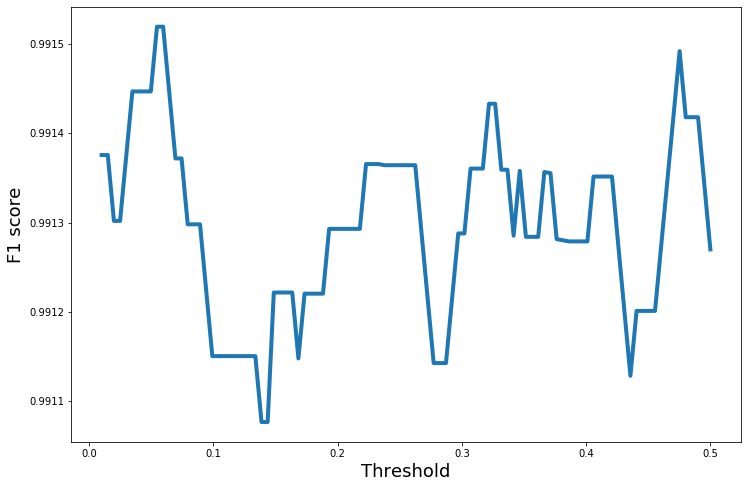

In [35]:
thresholds = np.linspace(0.01, 0.5, 100)
f1_sc_xgb = np.array([f1_score(y_train_sm,pred_train_xgb[:,1] > thr) for thr in thresholds])
plt.figure(figsize=(12,8))
plt.plot(thresholds, f1_sc_xgb, linewidth=4 )
plt.ylabel("F1 score", fontsize=18)
plt.xlabel("Threshold", fontsize=18)
best_thr_xgb = thresholds[f1_sc_xgb.argmax()]
print(f1_sc_xgb.max())

In [36]:
show_accuracy(pred_train_xgb[:,1],y_train_sm, labels, best_thr_xgb, nclass)

              precision    recall  f1-score   support

      Normal     0.9932    0.9897    0.9915      6827
  Bankruptcy     0.9898    0.9933    0.9915      6827

    accuracy                         0.9915     13654
   macro avg     0.9915    0.9915    0.9915     13654
weighted avg     0.9915    0.9915    0.9915     13654

[[6757   70]
 [  46 6781]]
